<a href="https://colab.research.google.com/github/riponalmamun/Serial-Section-Histopathology/blob/main/Serial_Section_Histopathology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Loading and Preprocessing

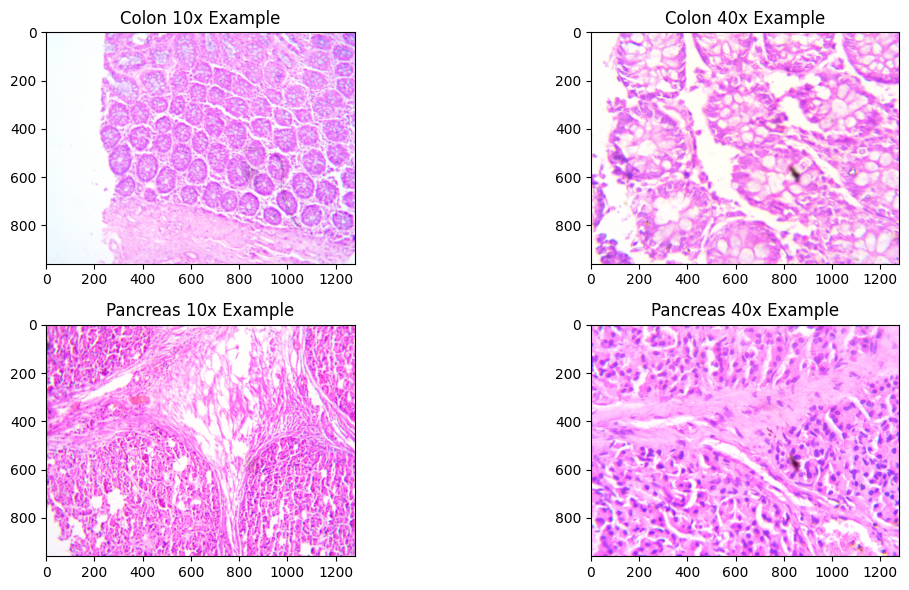

In [ ]:
import os
import cv2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# Paths to dataset directories
base_path = "/content/drive/MyDrive/Serial Section Histopathology Images Dataset"
colon_10x_path = os.path.join(base_path, "Colon/10x colon")
colon_40x_path = os.path.join(base_path, "Colon/40x colon")
pancreas_10x_path = os.path.join(base_path, "Pancreas/10x Pancreas")
pancreas_40x_path = os.path.join(base_path, "Pancreas/40x Pancreas")

# Function to load images
def load_images(folder):
    image_paths = glob(os.path.join(folder, "*.tif"))
    images = []
    for img_path in image_paths:
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Load in RGB format
        images.append(img)
    return np.array(images), image_paths

# Load images from each category
colon_10x, colon_10x_paths = load_images(colon_10x_path)
colon_40x, colon_40x_paths = load_images(colon_40x_path)
pancreas_10x, pancreas_10x_paths = load_images(pancreas_10x_path)
pancreas_40x, pancreas_40x_paths = load_images(pancreas_40x_path)

# Display example images from each category
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(colon_10x[0], cv2.COLOR_BGR2RGB))
plt.title("Colon 10x Example")

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(colon_40x[0], cv2.COLOR_BGR2RGB))
plt.title("Colon 40x Example")

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(pancreas_10x[0], cv2.COLOR_BGR2RGB))
plt.title("Pancreas 10x Example")

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(pancreas_40x[0], cv2.COLOR_BGR2RGB))
plt.title("Pancreas 40x Example")

plt.tight_layout()
plt.show()


# Exploratory Data Analysis (EDA)

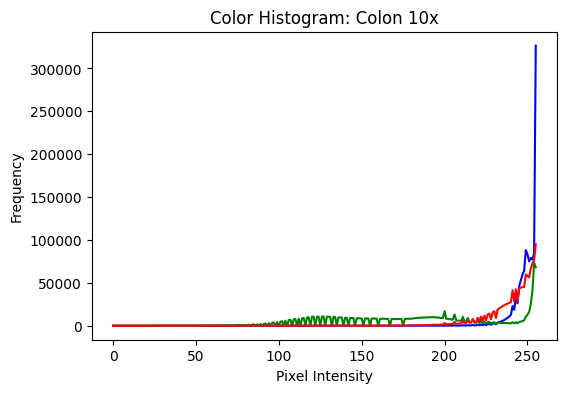

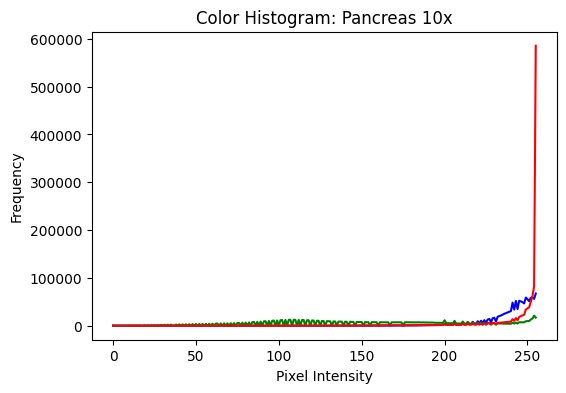

In [ ]:
# Function to plot color histograms
def plot_color_histogram(image, title):
    colors = ('b', 'g', 'r')
    plt.figure(figsize=(6, 4))
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.title(f"Color Histogram: {title}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Example: Analyze histograms for sample images
plot_color_histogram(colon_10x[0], "Colon 10x")
plot_color_histogram(pancreas_10x[0], "Pancreas 10x")


# Image Segmentation

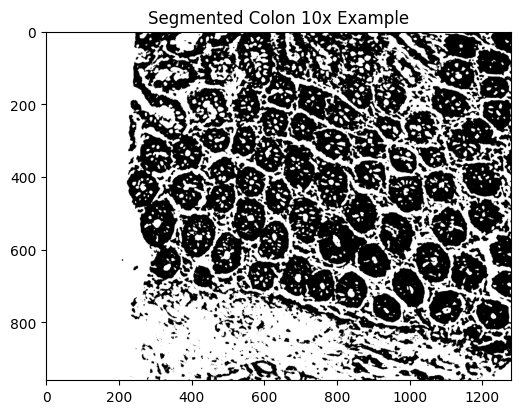

In [ ]:
# Simple segmentation using Otsu's thresholding
def segment_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary

# Apply segmentation to a sample image
segmented_colon = segment_image(colon_10x[0])
plt.figure(figsize=(6, 6))
plt.imshow(segmented_colon, cmap='gray')
plt.title("Segmented Colon 10x Example")
plt.show()


# Feature Extraction

In [ ]:
from skimage.feature import graycomatrix, graycoprops # Changed greycomatrix to graycomatrix and greycoprops to graycoprops

# Extract Haralick texture features
def extract_haralick_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = graycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True) # Changed greycomatrix to graycomatrix
    features = {
        'contrast': graycoprops(glcm, 'contrast')[0, 0], # Changed greycoprops to graycoprops
        'dissimilarity': graycoprops(glcm, 'dissimilarity')[0, 0], # Changed greycoprops to graycoprops
        'homogeneity': graycoprops(glcm, 'homogeneity')[0, 0], # Changed greycoprops to graycoprops
        'energy': graycoprops(glcm, 'energy')[0, 0], # Changed greycoprops to graycoprops
        'correlation': graycoprops(glcm, 'correlation')[0, 0] # Changed greycoprops to graycoprops
    }
    return features

# Example: Extract features from a colon 10x image
features = extract_haralick_features(colon_10x[0])
print("Haralick Features (Colon 10x):", features)

Haralick Features (Colon 10x): {'contrast': 47.35123631743549, 'dissimilarity': 4.400361610633308, 'homogeneity': 0.3212051697061582, 'energy': 0.06596822505436022, 'correlation': 0.9762847948387477}


# Classification with Machine Learning
# Prepare data for classification (e.g., magnification type or tissue type). Train models such as Random Forest or SVM.bold text

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Placeholder: Extract features from all images for classification
# Note: This assumes you have labels for each image (e.g., 0 for 10x, 1 for 40x).
X = []  # Feature vectors
y = []  # Labels

# Populate X and y with features and labels for each image
for image, label in [(colon_10x[i], 0) for i in range(len(colon_10x))] + \
                   [(colon_40x[i], 1) for i in range(len(colon_40x))] + \
                   [(pancreas_10x[i], 0) for i in range(len(pancreas_10x))] + \
                   [(pancreas_40x[i], 1) for i in range(len(pancreas_40x))]:
    features = extract_haralick_features(image)
    X.append(list(features.values()))  # Add feature values to X
    y.append(label)  # Add label to y

# Example: Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.94      1.00      0.97        16

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



# Advanced Preprocessing
Image Augmentation:
Augment data for better generalization when training models.

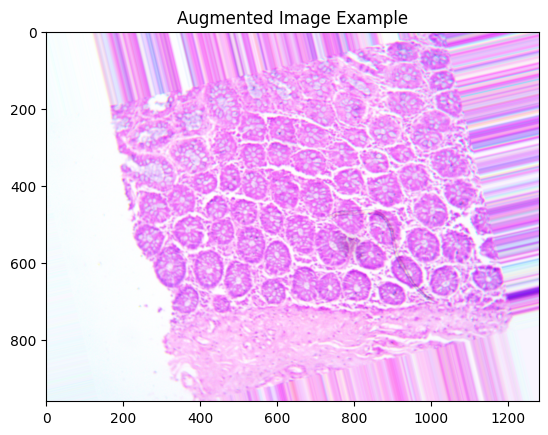

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Example of augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply augmentation to one image
image = colon_10x[0]
image = np.expand_dims(image, axis=0)  # Add batch dimension

aug_iter = datagen.flow(image)
aug_image = next(aug_iter)[0].astype('uint8')

plt.imshow(cv2.cvtColor(aug_image, cv2.COLOR_BGR2RGB))
plt.title("Augmented Image Example")
plt.show()


# Clustering for Unsupervised Analysis
Discover patterns using clustering techniques like K-Means.

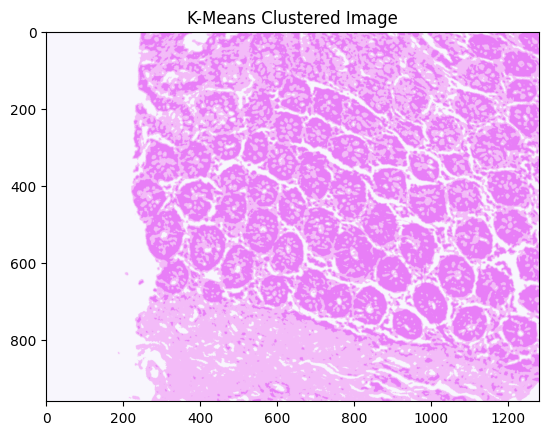

In [ ]:
from sklearn.cluster import KMeans

# Flatten image for clustering
image_flat = colon_10x[0].reshape((-1, 3))
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(image_flat)

# Reconstruct clustered image
clustered_image = kmeans.cluster_centers_[kmeans.labels_].reshape(colon_10x[0].shape)
clustered_image = clustered_image.astype('uint8')

plt.imshow(cv2.cvtColor(clustered_image, cv2.COLOR_BGR2RGB))
plt.title("K-Means Clustered Image")
plt.show()




# Deep Learning Classification
Train a convolutional neural network (CNN) for magnification or tissue type classification.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Example CNN
# Updated input_shape to reflect the resized image dimensions (128, 128, 3)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # Adjust based on number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Placeholder: Prepare X_train, y_train with image resizing and labels
# Resize images to (128, 128) for faster training
X_train_resized = [cv2.resize(img, (128, 128)) for img in colon_10x]

# Fix: Create proper labels for binary classification (0 and 1)
# Assuming colon_10x corresponds to label 0 and colon_40x to label 1
# You might need to adjust this based on your actual labels
num_colon_10x = len(colon_10x)
num_colon_40x = len(colon_40x)  # Assuming you have colon_40x data
y_train = [0] * num_colon_10x + [1] * num_colon_40x
y_train_encoded = to_categorical(y_train)

# Train model
model.fit(np.array(X_train_resized + [cv2.resize(img, (128, 128)) for img in colon_40x]), np.array(y_train_encoded), epochs=10, batch_size=8) # Updated X_train_resized to include data for both classes

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4745 - loss: 1260.3542
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4903 - loss: 23.8824
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4826 - loss: 8.4545
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4310 - loss: 5.4636
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7312 - loss: 0.8191
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9415 - loss: 0.2127
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9950 - loss: 0.0662
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9984 - loss: 0.0259
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0417
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0168


# Comparative Analysis of Magnifications
Analyze how tissue details differ between 10x and 40x magnifications.

In [ ]:
from skimage.metrics import structural_similarity as ssim

# Compare a 10x and 40x image
gray_10x = cv2.cvtColor(colon_10x[0], cv2.COLOR_BGR2GRAY)
gray_40x = cv2.cvtColor(colon_40x[0], cv2.COLOR_BGR2GRAY)

ssim_value, _ = ssim(gray_10x, gray_40x, full=True)
print(f"Structural Similarity Index (SSIM) between 10x and 40x: {ssim_value}")


Structural Similarity Index (SSIM) between 10x and 40x: 0.30852115531813634
